In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

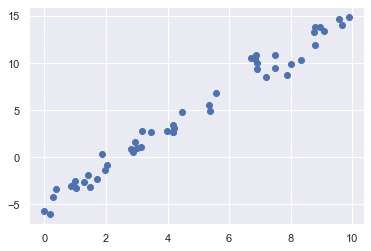

In [223]:
# create data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

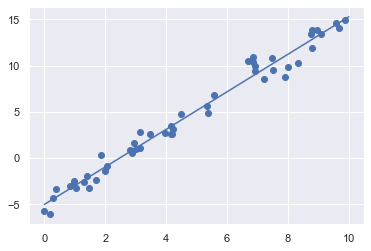

In [224]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [225]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [226]:
# multidimension
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # 100 3-dimension array
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # dot product of two arrays, which is a 100*1 matrix

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000109
[ 1.5 -2.   1. ]


In [227]:
# Polynomial basis functions
# increase the dimensions which actually is increasing the parameters to be determined in the model
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(2, include_bias=False) # do not include 1
poly.fit_transform(x[:, None]) # x[:, None] is 3*1 matrix

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

In [228]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

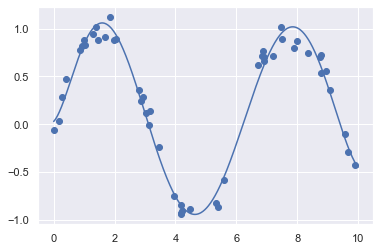

In [229]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis]) # xfit = np.linspace(0, 10, 1000)

plt.scatter(x, y)
plt.plot(xfit, yfit);

call fit in GaussianFeatures
call transform in GaussianFeatures
fit done
call transform in GaussianFeatures


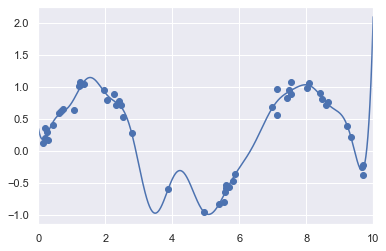

In [230]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
# Gaussian basis functions
# y = A1G1(x) + A2G2(x) + ... + AnGn(x), Gi(x) is gaussian function with centers spread along the data range, and fixed width determined by range of x and N
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    # x data, y centers (easy to be confused with y = f(x))
    # it will simply return N elements for each x, which is G1(x)...Gn(x) 
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        # print(f"this is the shape of x: {np.shape(x)}")
        # print(x)
        # print(f"this is y: {y}")
        # print(y)
        # print(f"this is the shape of arg: {np.shape(arg)}")
        # print(arg)
        # print(f"this is arg^2: {arg ** 2}")
        # print(f"this is sum of arg^2, axis = 1: {np.sum(arg ** 2, axis)}")
        return np.exp(-0.5 * np.sum(arg ** 2, axis)) # Axis or axes along which a sum is performed
        
    def fit(self, X, y=None):
        print("call fit in GaussianFeatures")
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        print("call transform in GaussianFeatures")
        # x it self is a matrix, the return will increase its dimenson again
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), # N = 20
                            LinearRegression())
# it will call fit then transform in GaussianFeatures
gauss_model.fit(x[:, np.newaxis], y) # x is a 50*1 matrix, y is a 50 array

print("fit done")

# it will call transform in GaussianFeatures, because the model has already been fit to the training data
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [231]:
# example
x = np.array([1, 2])
gauss = GaussianFeatures(2)
gauss.fit_transform(x[:, None]) 

call fit in GaussianFeatures
call transform in GaussianFeatures


array([[1.       , 0.8824969],
       [0.8824969, 1.       ]])

call fit in GaussianFeatures
call transform in GaussianFeatures
call transform in GaussianFeatures


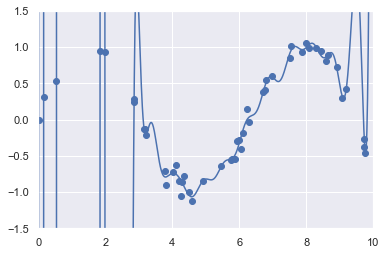

In [232]:
# over fit
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

call fit in GaussianFeatures
call transform in GaussianFeatures
call transform in GaussianFeatures


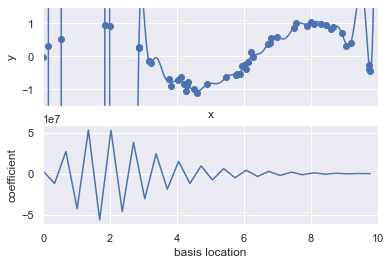

In [233]:
# plot the coefficients

def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_) # plot the coefficients against the center of the gaussian functions
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)
# the coefficients of adjacent basis functions blow up and cancel each other out.

call fit in GaussianFeatures
call transform in GaussianFeatures
call transform in GaussianFeatures


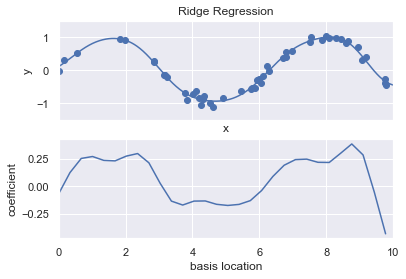

In [234]:
# Ridge regression (L2 Regularization)
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1)) # controlling the complexity of the resulting model
basis_plot(model, title='Ridge Regression') # be determined via, for example, cross-validation 

call fit in GaussianFeatures
call transform in GaussianFeatures
call transform in GaussianFeatures


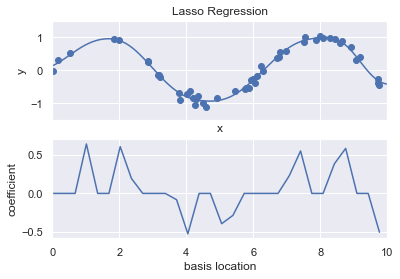

In [235]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression') # it prefers to set the coefficient to 0

In [236]:
# example: Predicting Bicycle Traffic

In [319]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
import pandas as pd
counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [321]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily = daily.drop(daily.index[2000:]) # drop data after 2018

In [322]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float) # true or faluse => 1, 0

In [323]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016') # DatetimeIndex
daily = daily.join(pd.Series(1, index=holidays, name='holiday')) # Series(2,...) means holiday is 1, others is NaN
daily['holiday'].fillna(0, inplace=True) # convert NaN to 0

(8.0, 17.0)

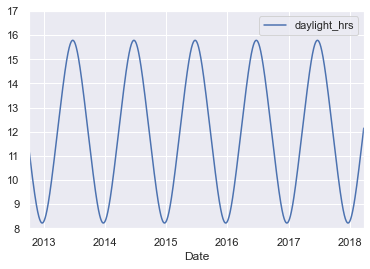

In [324]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days # how manys days from 2000-12-21 00:00:00
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [325]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int) # dry day is 0

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [327]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [345]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names] # without total coloum
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

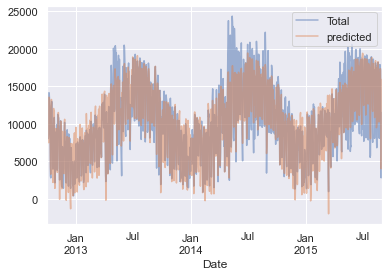

In [355]:
# compare tre and predict
daily[['Total', 'predicted']].plot(alpha=0.5);
#  Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., effects of precipitation and cold temperature) (nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures))

In [356]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

In [357]:
from sklearn.utils import resample
np.random.seed(1)
# Compute the standard deviation along the specified axis
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [358]:
print(pd.DataFrame({'effect': params.round(0), # the series
                    'error': err.round(0)})) # the std of coef in 1000 random fit

              effect  error
Mon           2020.0  345.0
Tue           2441.0  333.0
Wed           2371.0  331.0
Thu           1929.0  341.0
Fri            712.0  324.0
Sat          -4413.0  318.0
Sun          -4534.0  332.0
holiday      -4750.0  653.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  249.0
dry day       2191.0  133.0
Temp (C)       261.0   14.0
annual         108.0   71.0
